In [1]:
#import required packages
import pandas as pd

In [2]:
#import data
fifa19 = pd.read_csv('W:/Ckalib.Nelson/HackCville/Homework/fifa19/data.csv')
#first five results 
fifa19.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
#last five results
fifa19.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [4]:
#18,207 rows (players) and 89 columns (attributes)
fifa19.shape

(18207, 89)

In [6]:
#view columns in dataset
fifa19.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
#Create a function converting "Overall" into a category for World Class, First Team, etc. players
def overall_category(Overall):
    if Overall > 90:
        return "World Class"
    elif Overall <= 90 and Overall >= 85:
        return "First Team"
    elif Overall <=84 and Overall >= 80:
        return "Above Average"
    elif Overall <=79 and Overall >=70:
        return "Average"
    else:
        return "Below Average"
fifa19['Overall Category'] = fifa19['Overall'].apply(overall_category)
#An additional column from the previous count shows that a column has been added to the dataset
print(fifa19.shape)
print(fifa19.columns)

(18207, 91)
Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle

In [8]:
#Create a function converting "Overall" into a category for World Class, First Team, etc. players
def potential_category(Potential):
    if Potential > 90:
        return "World Class"
    elif Potential <= 90 and Potential >= 85:
        return "First Team"
    elif Potential <=84 and Potential >= 80:
        return "Above Average"
    elif Potential <=79 and Potential >=70:
        return "Average"
    else:
        return "Below Average"
fifa19['Potential Category'] = fifa19['Potential'].apply(potential_category)
#An additional column from the previous count shows that a column has been added to the dataset
print(fifa19.shape)
print(fifa19.columns)

(18207, 92)
Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle

In [9]:
#Create a column calculating the differnce between Overall and Potential to see those w/ the most potential opportunity
fifa19['Potential Rise'] = fifa19['Potential'] - fifa19['Overall']
print(fifa19.shape)
print(fifa19.columns)

(18207, 92)
Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle

In [10]:
#create dataframe of world class players
world_class = fifa19[fifa19['Overall Category'] =='World Class']

#create dataframe of first team players
first_team = fifa19[fifa19['Overall Category'] =='First Team']

#create dataframe of first team players
above_average_players = fifa19[fifa19['Overall Category'] =='Above Average']

#create dataframe of average players
average_players = fifa19[fifa19['Overall Category']=='Average']

#create dataframe of those w/ the potential of becoming world class players
potential_world_class = fifa19[(fifa19['Potential Category'] =='World Class') & (fifa19['Overall Category'] !='World Class')]

#create dataframe of those w/ the potential of becoming first team players
potential_first_team = fifa19[(fifa19['Potential Category'] =='First Team') & (fifa19['Overall Category'] !='First Team')]

#create dataframe those w/ the potential of becoming first team players
potential_above_average_players = fifa19[(fifa19['Potential Category'] =='Above Average') & (fifa19['Overall Category'] !='Above Average')]

#create dataframe those w/ the potential of becoming average players
potential_average_players = fifa19[(fifa19['Potential Category']=='Average') & (fifa19['Overall Category'] !='Average')]

In [11]:
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [12]:
#show all first team players
first_team.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Potential Rise,Overall Category,Potential Category
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M,3,First Team,World Class
10,10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,FC Bayern München,...,19.0,15.0,6.0,12.0,8.0,10.0,€127.1M,0,First Team,First Team
11,11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,...,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M,0,First Team,First Team
12,12,182493,D. Godín,32,https://cdn.sofifa.org/players/4/19/182493.png,Uruguay,https://cdn.sofifa.org/flags/60.png,90,90,Atlético Madrid,...,89.0,6.0,8.0,15.0,5.0,15.0,€90.2M,0,First Team,First Team
13,13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,...,29.0,6.0,15.0,7.0,6.0,12.0,€111M,0,First Team,First Team


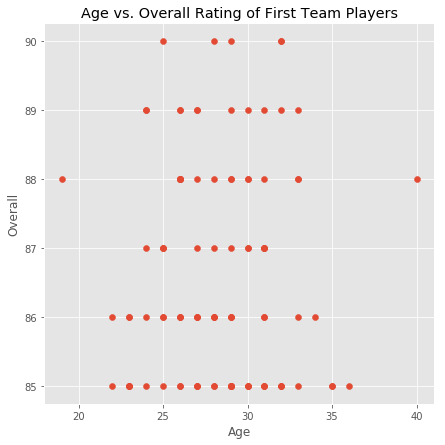

In [13]:
#plot scatter plot of relationship between Age and Overall of first team players
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(first_team[['Age']],first_team[['Overall']])
plt.ylabel('Overall')
plt.xlabel('Age')
plt.title('Age vs. Overall Rating of First Team Players')
plt.show()

#no significant relationship between the two variables

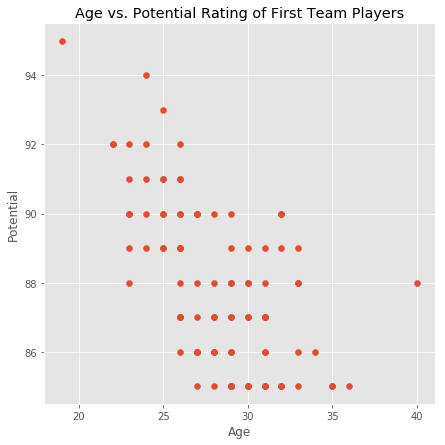

In [14]:
#plot scatter plot of relationship between Age and Potential of first team players
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(first_team[['Age']],first_team[['Potential']])
plt.ylabel('Potential')
plt.xlabel('Age')
plt.title('Age vs. Potential Rating of First Team Players')
plt.show()
#significant relationship between the two variables

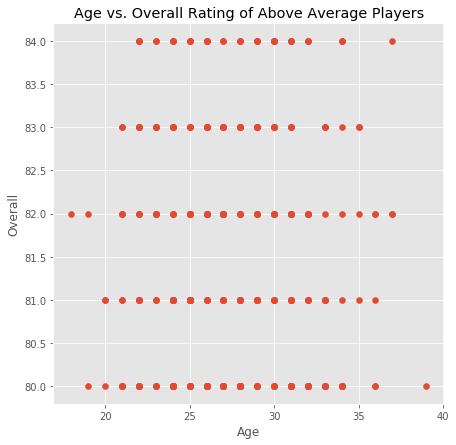

In [15]:
#plot scatter plot of relationship between Age and Overall of above average players
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(above_average_players[['Age']],above_average_players[['Overall']])
plt.ylabel('Overall')
plt.xlabel('Age')
plt.title('Age vs. Overall Rating of Above Average Players')
plt.show()

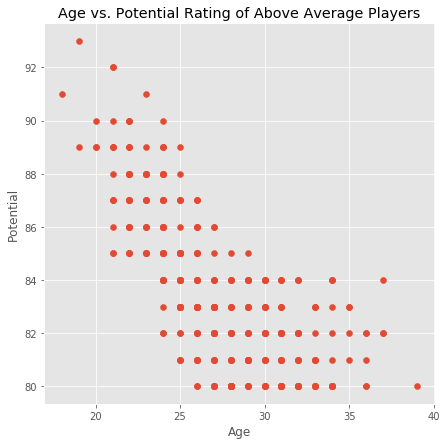

In [16]:
#plot scatter plot of relationship between Age and Potential of above average players
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(above_average_players[['Age']],above_average_players[['Potential']])
plt.ylabel('Potential')
plt.xlabel('Age')
plt.title('Age vs. Potential Rating of Above Average Players')
plt.show()
#significant relationship between the two variables

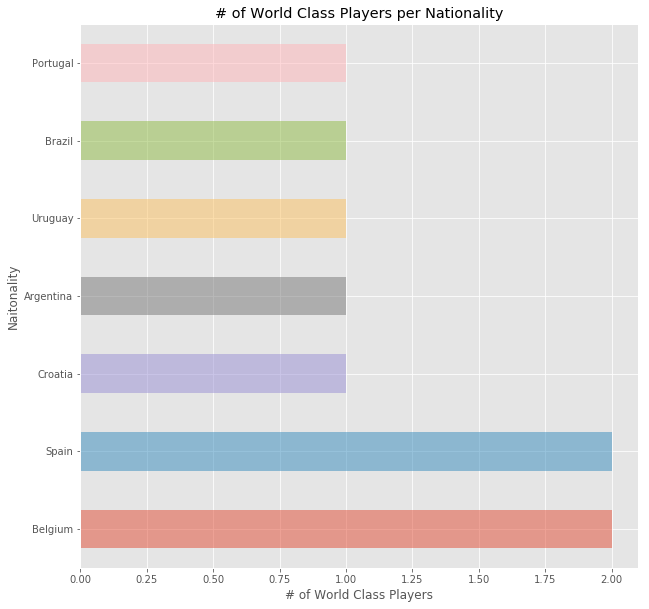

In [18]:
#visualize nationalities w/ the most world class players
world_class['Nationality'].value_counts().plot(kind='barh',alpha=0.5,figsize=(10,10))
plt.title('# of World Class Players per Nationality')
plt.xlabel('# of World Class Players')
plt.ylabel('Naitonality')
plt.show()

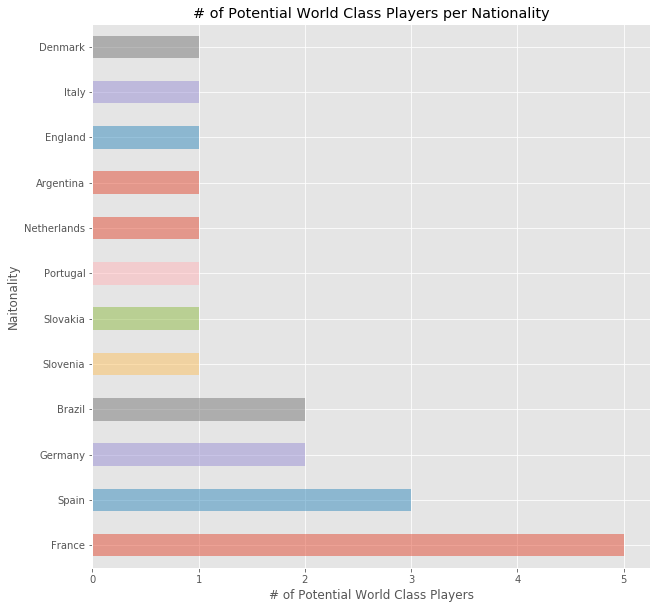

In [41]:
#visualize nationalities w/ the most potential world class players
potential_world_class['Nationality'].value_counts().plot(kind='barh',alpha=0.5,figsize=(10,10))
plt.title('# of Potential World Class Players per Nationality')
plt.xlabel('# of Potential World Class Players')
plt.ylabel('Naitonality')
plt.show()

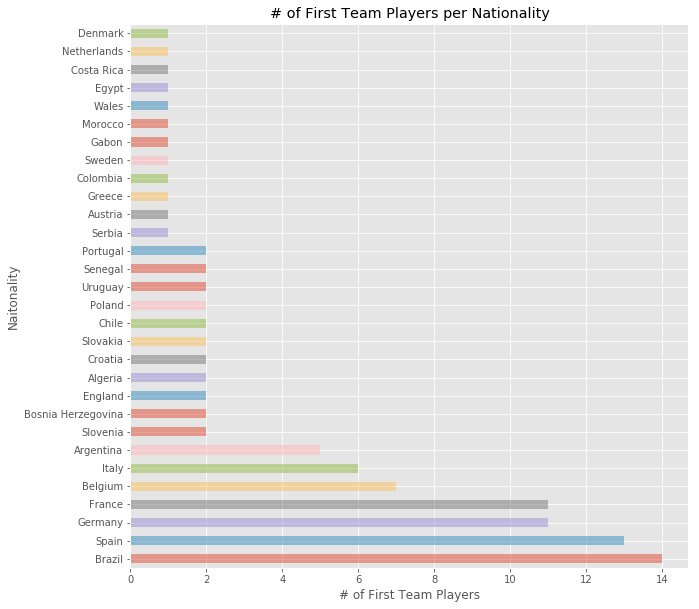

In [19]:
#visualize nationalities w/ the most first team players
first_team['Nationality'].value_counts().plot(kind='barh',alpha=0.5,figsize=(10,10))
plt.title('# of First Team Players per Nationality')
plt.xlabel('# of First Team Players')
plt.ylabel('Naitonality')
plt.show()

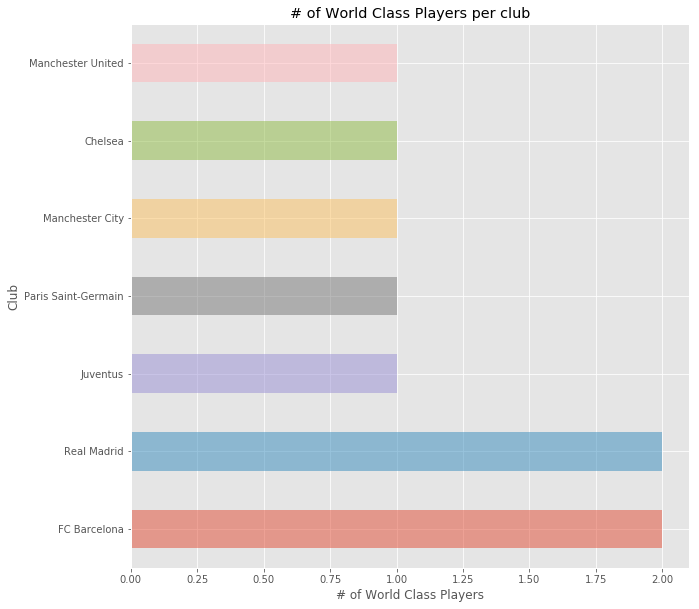

In [20]:
#visualize clubs w/ the most world class players
world_class['Club'].value_counts().plot(kind='barh',alpha=0.5,figsize=(10,10))
plt.title('# of World Class Players per club')
plt.xlabel('# of World Class Players')
plt.ylabel('Club')
plt.show()

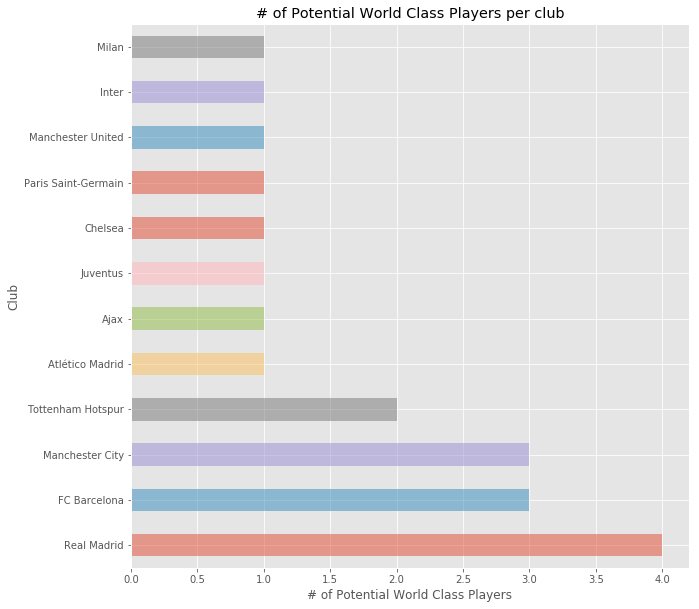

In [42]:
#visualize clubs w/ the most potential world class players
potential_world_class['Club'].value_counts().plot(kind='barh',alpha=0.5,figsize=(10,10))
plt.title('# of Potential World Class Players per club')
plt.xlabel('# of Potential World Class Players')
plt.ylabel('Club')
plt.show()

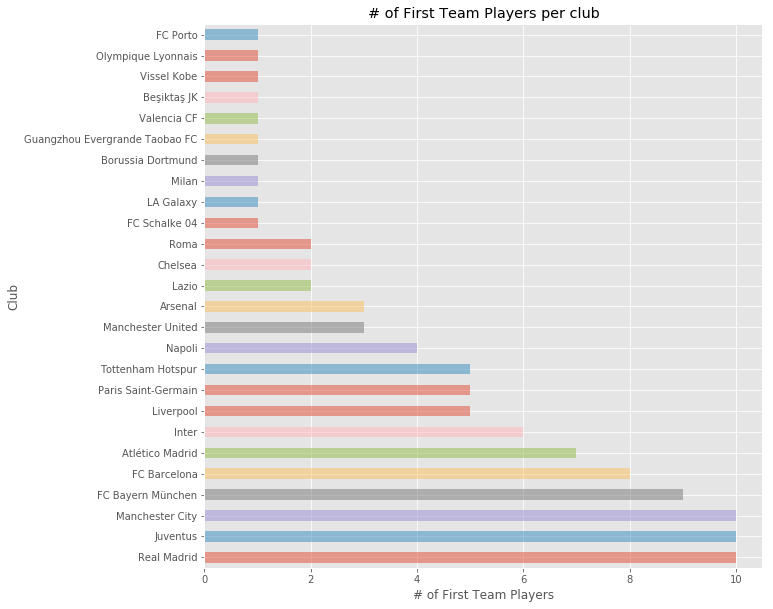

In [21]:
#visualize clubs w/ the most first team players
first_team['Club'].value_counts().plot(kind='barh',alpha=0.5,figsize=(10,10))
plt.title('# of First Team Players per club')
plt.xlabel('# of First Team Players')
plt.ylabel('Club')
plt.show()

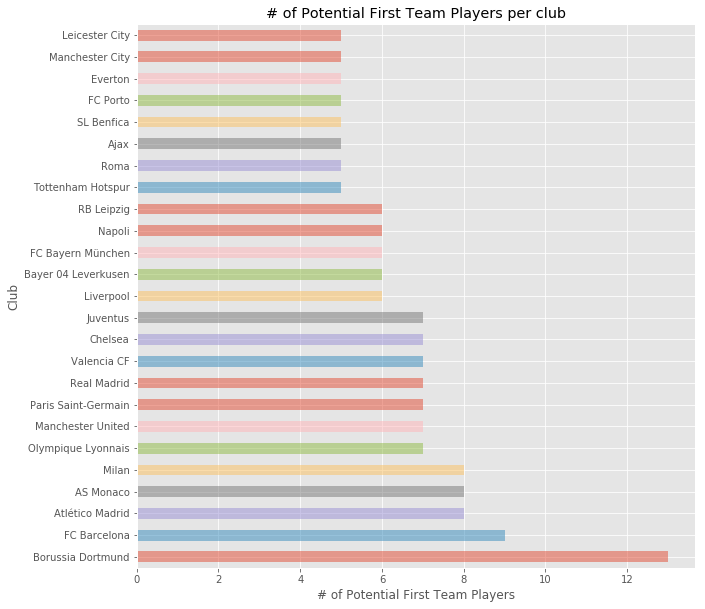

In [44]:
# top 25 clubs w/ the most potential first team players
potential_first_team['Club'].value_counts().head(25).plot(kind='barh',alpha=0.5,figsize=(10,10))
plt.title('# of Potential First Team Players per club')
plt.xlabel('# of Potential First Team Players')
plt.ylabel('Club')
plt.show()